# Final Project Report
#### Heyuan Huang, netID: hh638

## Getting Started

#### Describe the dataset and why it is interesting

The dataset used in this report is *Heart failure clinical records Data Set* on UCI Machine Learning Repository.

It contains 299 heart failure patients' clinical records with 13 attributes such as age, sex, anaemia, diabetes and so on, collected during their follow-up period. The target attribute we can predict is *death event*, indicating whether the patient died in the follow-up period. The interesting part is that we can select relevant variables to train models and predict the target label, i.e., calculate the death possibility of an input patient in a certain period.

#### Explain how you acquired it (e.g. via an API, file download, etc).
#### Discuss the FAIRness of the data provider. Include: Was the data well-annotated with metadata? Was the license clear?

1. The dataset is Findable and Accessible:
I found and downloaded the dataset's csv file from the UCI Machine Learning Repository official website, whose link is https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records#. This is an open dataset for everyone. It does not require any permission to access or download the data.


2. The dataset is Interoperable with metadata and Reusable under a clear license:
This dataset collected and donated by Tanvir Ahmad, etc (Government College University) is well-annotated with metadata and licensed under the Creative Commons Attribution 4.0 International copyright (CC BY 4.0). Therefore, users can feel free to share and adapt the data for any purpose and analysis. This is the link of the license https://creativecommons.org/licenses/by/4.0/legalcode

The 13 attributes are:

|Variable name| Units     |Data type|
| ----------- |-----------|---------|
| age| years old | numeric|
|anaemia| \\        |Binary numeric|
|high blood pressure|\\|Binary numeric|
|creatinine phosphokinase| mcg/L|numeric|
|diabetes |\\| Binary numeric|
|ejection fraction| Percentage |numeric|
|platelets| kiloplatelets/mL| numeric|
|sex |\\| Binary numeric|
|serum creatinine| mg/dL| numeric|
|serum sodium| mEq/L| numeric|
|smoking |\\| Binary numeric|
|time| days |numeric|
|Death event |\\| Binary numeric|

Below is a more detailed form of attribute information on the UCI repository official website.

![](attributeinfo.PNG)

#### Describe any data cleaning or other preprocessing

In the data preprocessing process, I test if there are any missing or duplicate values and outliers. The result is that there is no missing or duplicate values.

We define data $x_i$ as an outlier if $|x_i-\overline x|>6\sigma$, where $\overline x$ is the mean and $\sigma$ is the standard deviation. For the 12 attribute columns, we calculate every element's $Z-score=\frac{|x_i-\overline x|}{\sigma}$. If $Z-score>6$, it is an outlier. Its corresponding row is deleted. The new dataset has 295 rows, with 4 rows deleted.

#### Put data in standard format if necessary

I also applied data standardization to make every column's mean=0, standard deviation=1 before further analysis.

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
print('data shape',data.shape)
data.describe()

data shape (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
print(data.isnull().any())

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool


In [5]:
print(data.duplicated().sum())

0


In [6]:
variables=data.iloc[:,0:-1]
df_zscore = variables.copy()
cols = variables.columns
for col in cols:
    df_col = variables[col]
    z_score = (df_col - df_col.mean()) / df_col.std()
    df_zscore[col] = z_score.abs() > 6
print(df_zscore.any())
df_drop_outlier = data[df_zscore.any(axis=1) == False]
print('data shape after dropping outliers',df_drop_outlier.shape)
df_drop_outlier.to_csv('cleaned_data.csv',index=None)

age                         False
anaemia                     False
creatinine_phosphokinase     True
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine             True
serum_sodium                False
sex                         False
smoking                     False
time                        False
dtype: bool
data shape after dropping outliers (295, 13)


## Analysis

#### Any issues with summary statistics

I deleted outlier rows with particularly large deviations($>6\sigma$) and set a range of acceptable deviations($\le 6\sigma$) to allow for the presence of special individuals. Below are some summary statistics about the preprocessed data and corresponding issues' discussions. In short, summary statistics show that our dataset is imbalanced and not representative for the whole population. Therefore, we need more data of the missing population for reliable analysis and model generalization.

In [7]:
data=pd.read_csv('cleaned_data.csv')

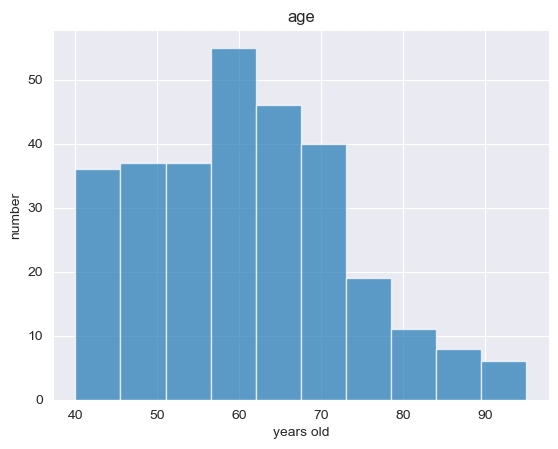

In [8]:
plt.hist(data.age,alpha=0.7)
plt.title('age')
plt.xlabel('years old')
plt.ylabel('number')
plt.savefig('age.png')
plt.show()

From the 'age' distribution histogram, we know that this dataset is not representative for the whole population because it only includes patients over 40 years old. If we want to generalize our model, we need to do some data interpolation or collect young patients' data to fill missing values.

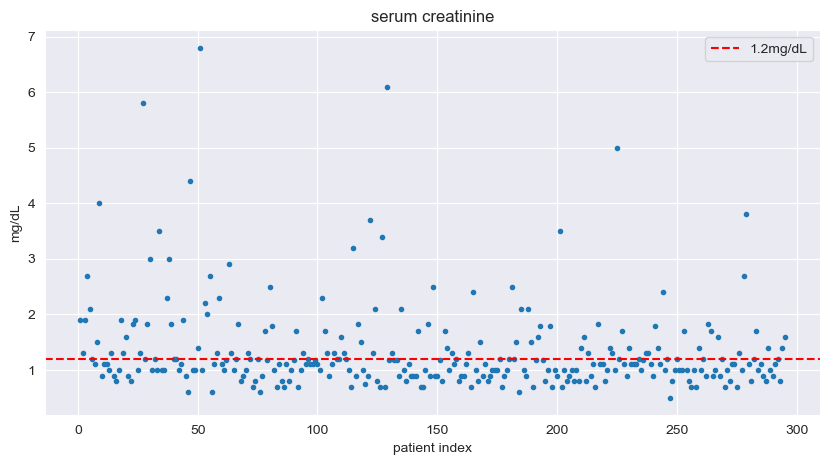

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(np.linspace(1,len(data),len(data),endpoint=True),data.serum_creatinine,marker='.')
plt.axhline(1.2,color='red',linestyle='--',label='1.2mg/dL')
plt.title('serum creatinine')
plt.xlabel('patient index')
plt.ylabel('mg/dL')
plt.legend()
plt.savefig('serum_creatinine.png')
plt.show()

Normal value of serum creatinine is below 1.2 mg/dL. If it is higher than 1.2, we can assume there might be renal impairment. This serum creatinine scatterplot of the dataset shows that most heart failure patients' values are below 1.2. But there are still many subjects possibily have renal impairment.

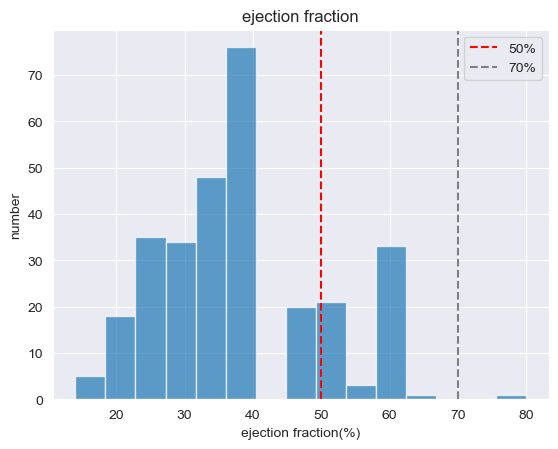

In [10]:
plt.hist(data.ejection_fraction,alpha=0.7,bins=15)
plt.axvline(50,color='red',linestyle='--',label='50%')
plt.axvline(70,color='grey',linestyle='--',label='70%')
plt.title('ejection fraction')
plt.xlabel('ejection fraction(%)')
plt.ylabel('number')
plt.legend()
plt.savefig('ejection_fraction.png')
plt.show()

Normal values of ejection fraction are between 50% and 70%. If it is smaller than 50%, we can assume there is probably a heart failure condition. The ejection fraction histogram of our dataset indicates the majority's values are below 40%, in line with the heart failure due to reduced ejection fraction(HFrEF) disgnostic criteria.

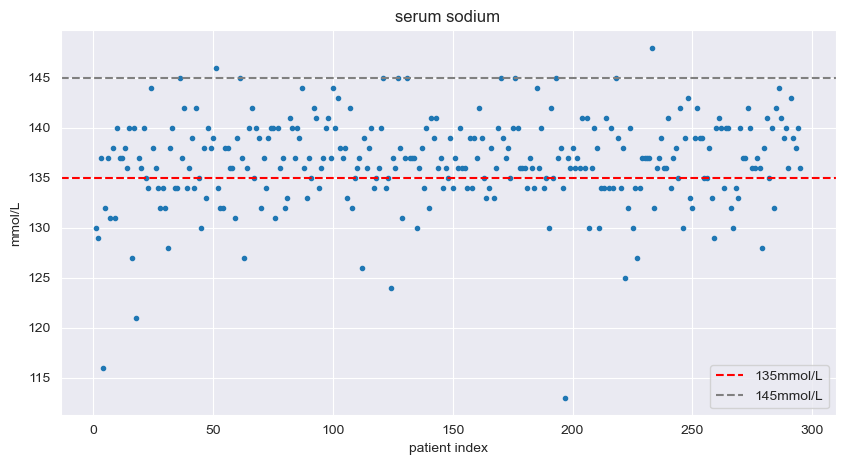

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(np.linspace(1,len(data),len(data),endpoint=True),data.serum_sodium,marker='.')
plt.axhline(135,color='red',linestyle='--',label='135mmol/L')
plt.axhline(145,color='gray',linestyle='--',label='145mmol/L')
plt.title('serum sodium')
plt.xlabel('patient index')
plt.ylabel('mmol/L')
plt.legend()
plt.savefig('serum_sodium.png')
plt.show()

Normal interval of serum sodium is [135,145]. Serum sodium lower than 135 mmol/L qualifies as hyponatremia and lower than 125 mmol/L is severe hyponatremia. It can occur from heart failure. Some patients in our dataset have obviously low serum sodium values.

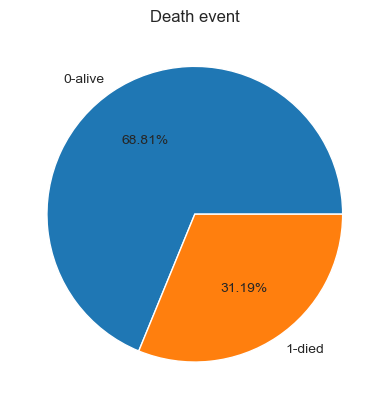

In [12]:
ratio=data.DEATH_EVENT.value_counts()
plt.pie(ratio/299,labels=['0-alive','1-died'], autopct='%.2f%%')
plt.title('Death event')
plt.savefig('death.png')
plt.show()

Our dataset has 68.8% negative samples and 31.2% positive samples. It is unbalanced. Therefore, our model might be biased and prone to give negative predictions.

#### Discuss the analyses you chose to run (why, results, surprises, validation)

#### All analyses generate graphs (correlation heatmap, confusion matrix, PCA 2-dim scatter plot) and most analyses take several parameters.

1. Besides summary statistics, I analyzed correlations among variables to find whether there is any linear relationship among variables. The result is that there is very weak linear relationship among variables because  abs(coefficient)<0.2.


2. I also trained several models to make predictions about an input patient's survival possibility. I trained models with 70% of the dataset and tested them using the rest 30% data. Accuracy, F1-score, MCC (Matthews correlation coefficient) are evaluation metrics. MCC is a better evaluation metrics than others on this unbalanced dataset as it requires the model to have high accuracy on both positive and negative samples to achieve high MCC score. MCC ranges from +1 to -1, where +1 is the best prediction, 0 means random prediction and -1 is the worst prediction performance.

The table shows the performance of the following classification models,


|Model|Accuracy|MCC|F1-score|
|---|---|---|---|
|Logistic Regression|0.83|0.61|0.72|
|Ridge Classifier|0.84|0.64|0.74|
|Random Forest (n=19)|0.79|0.50|0.63|
|Decision Tree|0.74|0.42|0.61|
|KNN (n=5)|0.74|0.38|0.44|
|SVM (rbf)|0.78|0.47|0.58|

Logistic Regression and Ridge Classifier perform better than others.

3. I also applied principal component analysis (PCA) to find whether it is possible to use PCA to reduce dimensions if the first several components contain enough information (>80%) to describe the whole dataset. The result is that the first 5 components only retain 57% of the whole dataset information, which is much lower than my expectation and surprising.


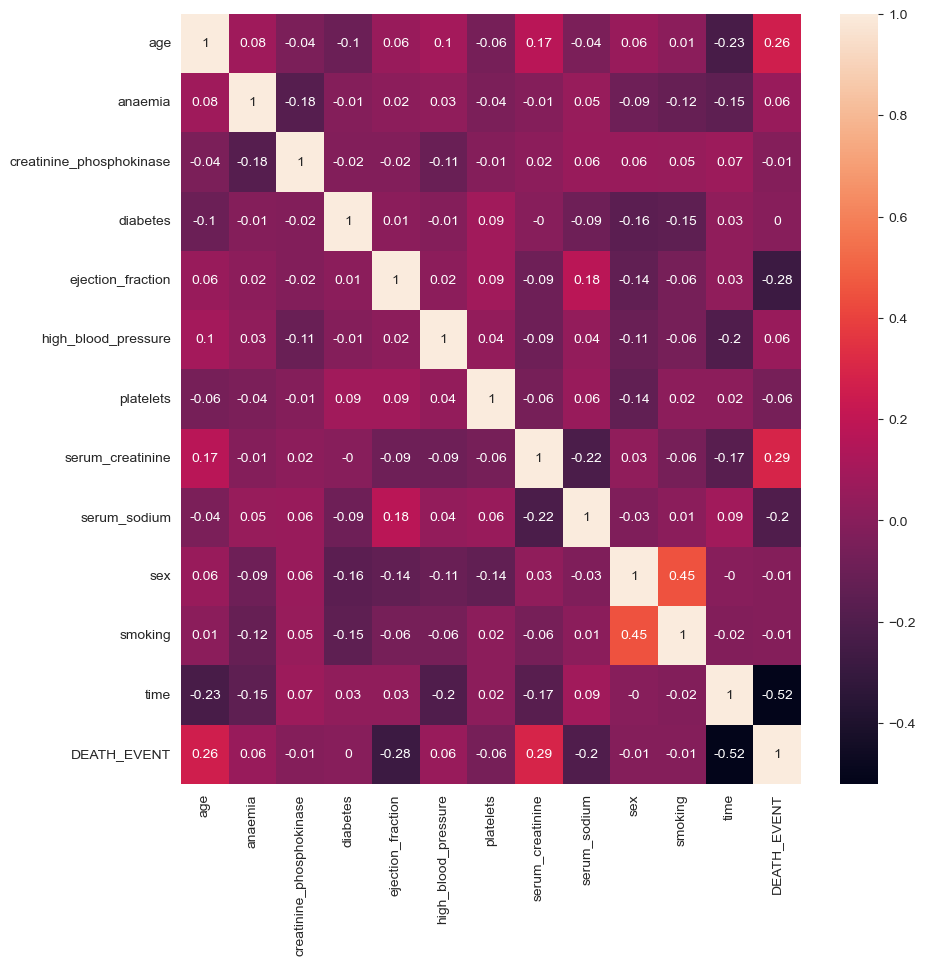

In [13]:
data=pd.read_csv('cleaned_data.csv')
plt.figure(figsize=(10,10))
sns.heatmap(np.round(data.corr(),2),annot=True)
plt.savefig('corr.png')



From the correlation map, we can see that linear correlation among attributes is very low. Most of the correlation coefficients are less than 0.2. There is only one coefficient reaching 0.45 between 'sex' and 'smoking'.

To predict the death_event target, follow-up period time has the highest absolute correlation coefficient, abs(-0.52), and is negatively correlated. It means that the longer the time, the lower the 'death_event' value (0 indicates the patient is alive and 1 is died). 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium' have the second highest coefficients, which are 0.29, -0.28, 0.26, -0.2 respectively. These five variables might contain most of the information needed to make predictions. Other attributes' coefficients are less than 0.1.

Note that correlation can only reflect whether there is a linear relationship between the independent and dependent varibales. It can not exclude the non-linear relationship between variables, such as exponential or square relationships.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, matthews_corrcoef, f1_score
import pickle
np.random.seed(20)
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:-1],data.DEATH_EVENT,test_size=0.3,random_state=20)
print('y_test set\n',y_test.value_counts()) #89 samples in the test set
# print(y_train.value_counts()) #206 samples in the training set
print('training set X shape',X_train.shape) # 12 variables in the train_X
print('X train mean:',np.mean(X_train,axis=0))
print('X train std:',np.std(X_train,axis=0))
STDS = StandardScaler()
STDS.fit(X_train)
X_train = STDS.transform(X_train)
X_test = STDS.transform(X_test)
print('Standardization params, mean:',STDS.mean_)
print('Standardization params, std:',np.sqrt(STDS.var_))

y_test set
 0    59
1    30
Name: DEATH_EVENT, dtype: int64
training set X shape (206, 12)
X train mean: age                             60.804209
anaemia                          0.422330
creatinine_phosphokinase       556.077670
diabetes                         0.422330
ejection_fraction               37.766990
high_blood_pressure              0.330097
platelets                   270237.924369
serum_creatinine                 1.367136
serum_sodium                   136.728155
sex                              0.665049
smoking                          0.339806
time                           130.956311
dtype: float64
X train std: age                             11.588874
anaemia                          0.493931
creatinine_phosphokinase       838.148934
diabetes                         0.493931
ejection_fraction               11.566779
high_blood_pressure              0.470248
platelets                   100616.641472
serum_creatinine                 0.890433
serum_sodium               

In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=1.0,penalty='l2')
LR.fit(X_train,y_train)
LR_pred=LR.predict(X_test)
# print(LR_pred)
LR_prob=LR.predict_proba(X_test)
# print(np.max(LR_prob,axis=1))
# print('accuracy',LR.score(X_test,y_test))
print(classification_report(y_test,LR_pred))
print('MCC',matthews_corrcoef(y_test,LR_pred))
print('f1-score',f1_score(y_test,LR_pred))
filename='logistic.sav'
pickle.dump(LR,open(filename,'wb'))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        59
           1       0.83      0.63      0.72        30

    accuracy                           0.83        89
   macro avg       0.83      0.78      0.80        89
weighted avg       0.83      0.83      0.83        89

MCC 0.6106769931087861
f1-score 0.7169811320754716


In [16]:
from sklearn.linear_model import RidgeClassifier
clf=RidgeClassifier()
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_test)
# print(clf_pred)
print(classification_report(y_test,clf_pred))
print('MCC',matthews_corrcoef(y_test,clf_pred))
print('f1-score',f1_score(y_test,clf_pred))
filename='ridge.sav'
pickle.dump(clf,open(filename,'wb'))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        59
           1       0.83      0.67      0.74        30

    accuracy                           0.84        89
   macro avg       0.84      0.80      0.81        89
weighted avg       0.84      0.84      0.84        89

MCC 0.637906361128805
f1-score 0.7407407407407408


In [17]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(19)#criterion:'gini' index
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_test)
# print(clf.predict_proba(X_test))
print(classification_report(y_test,clf_pred))
print('MCC',matthews_corrcoef(y_test,clf_pred))
print('f1-score',f1_score(y_test,clf_pred))
filename='randomforest.sav'
pickle.dump(clf,open(filename,'wb'))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        59
           1       0.76      0.53      0.63        30

    accuracy                           0.79        89
   macro avg       0.78      0.72      0.74        89
weighted avg       0.78      0.79      0.78        89

MCC 0.49942441034462026
f1-score 0.6274509803921569


In [18]:
# Decision Tree
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_test)
# print(clf.predict_proba(X_test))
print(classification_report(y_test,clf_pred))
print('MCC',matthews_corrcoef(y_test,clf_pred))
print('f1-score',f1_score(y_test,clf_pred))
filename='decisiontree.sav'
pickle.dump(clf,open(filename,'wb'))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81        59
           1       0.62      0.60      0.61        30

    accuracy                           0.74        89
   macro avg       0.71      0.71      0.71        89
weighted avg       0.74      0.74      0.74        89

MCC 0.41710925257032827
f1-score 0.6101694915254238


In [19]:
print(data.DEATH_EVENT.unique())

[1 0]


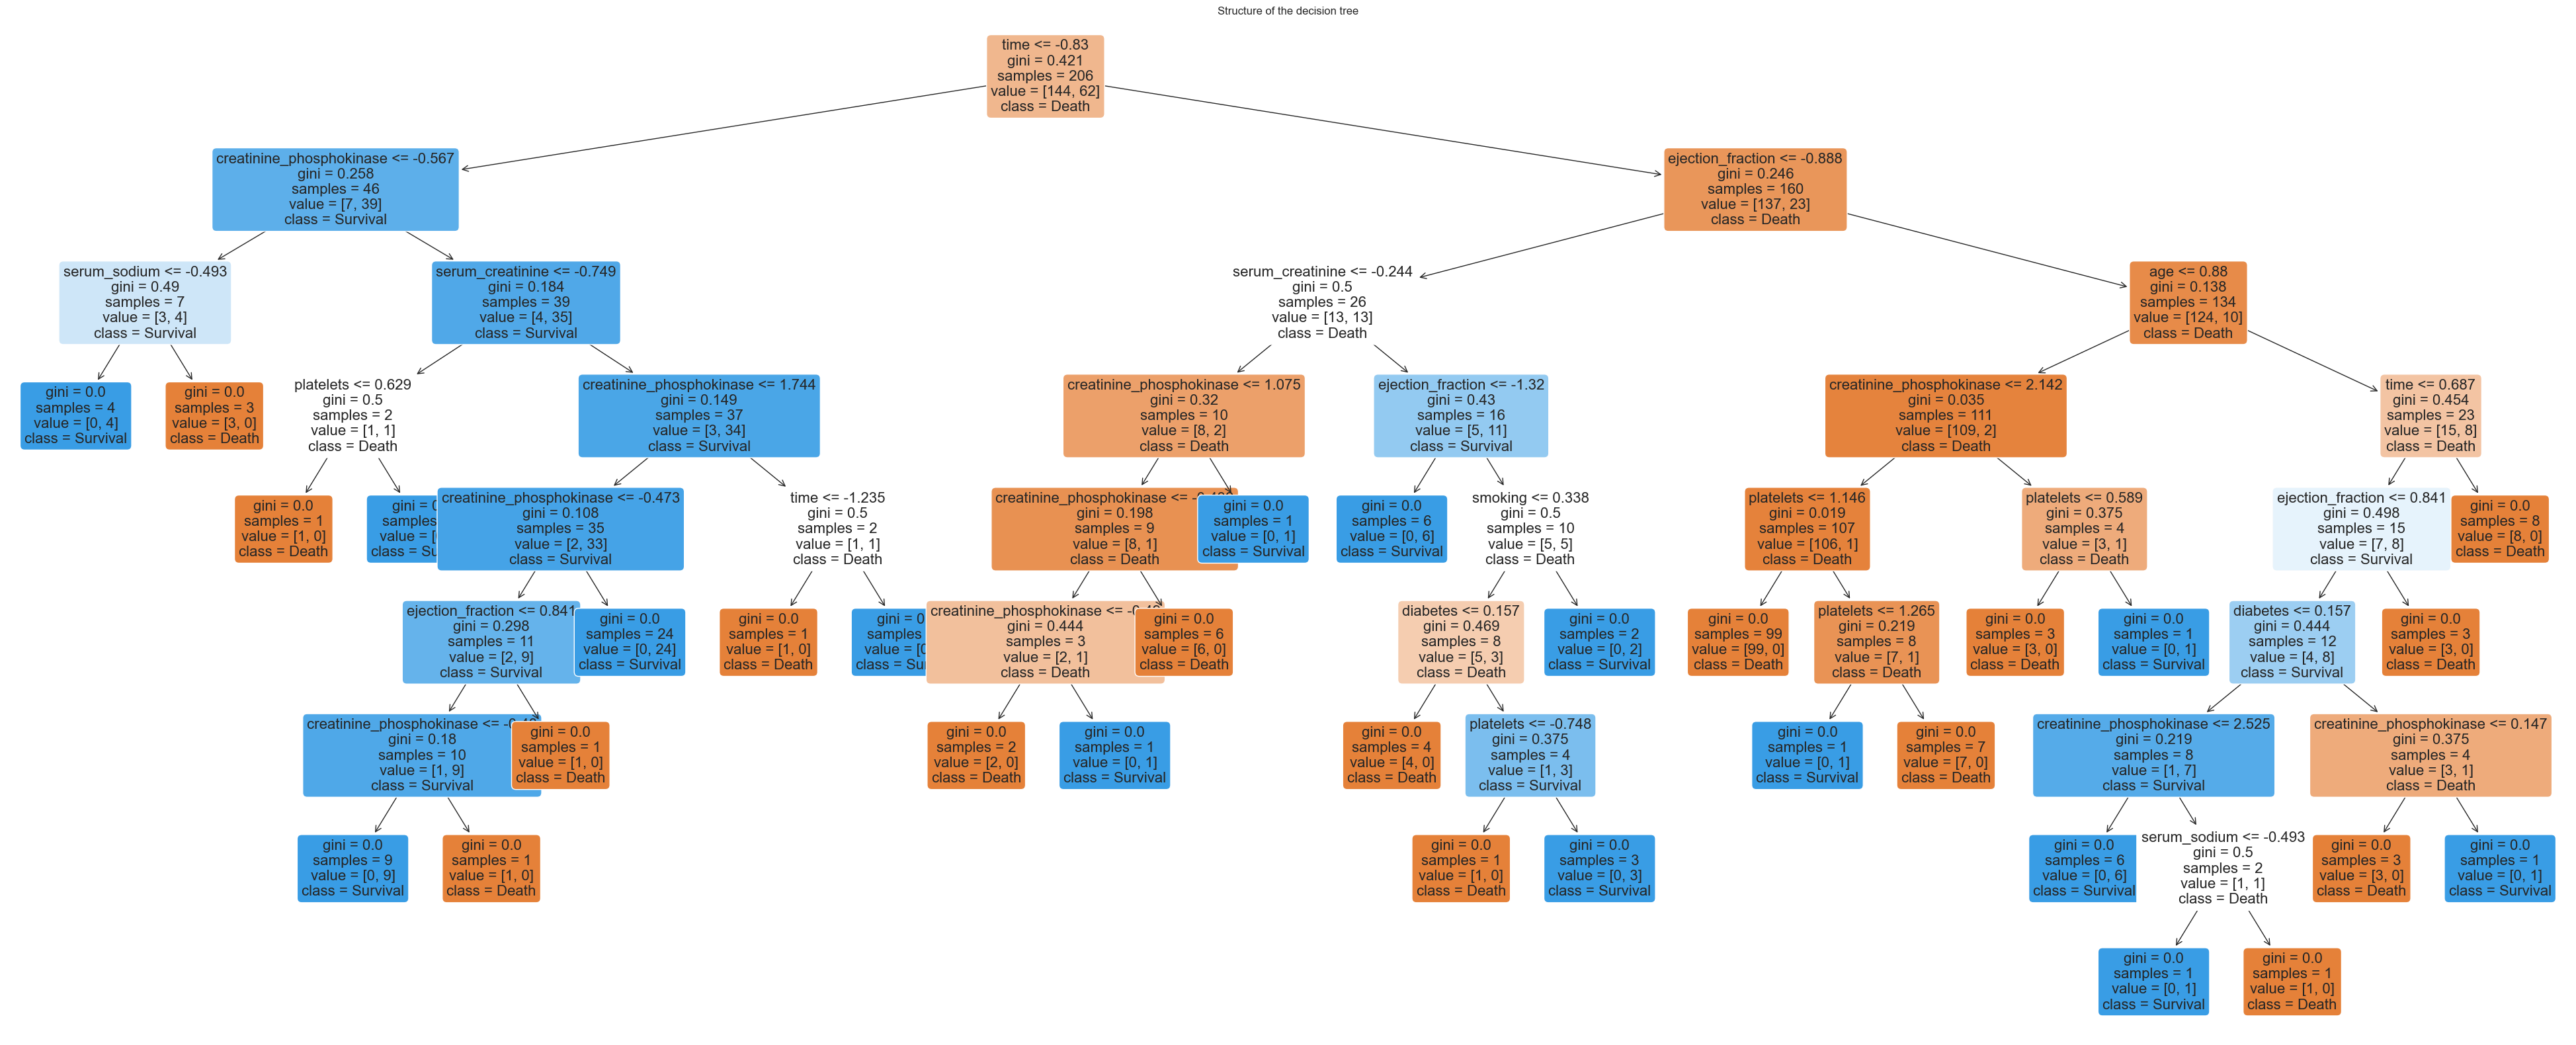

In [20]:
plt.figure(figsize=(50,20))
a = tree.plot_tree(clf, feature_names= data.drop(columns='DEATH_EVENT').columns,
                   class_names=['Death','Survival'],
                   rounded = True,
                   filled = True,
                   fontsize=16)
plt.title('Structure of the decision tree')
plt.savefig('Structure of the decision tree.png')
plt.show()

In [21]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(5)
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_test)
# print(clf.predict_proba(X_test))
print(classification_report(y_test,clf_pred))
print('MCC',matthews_corrcoef(y_test,clf_pred))
print('f1-score',f1_score(y_test,clf_pred))
filename='knn.sav'
pickle.dump(clf,open(filename,'wb'))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83        59
           1       0.82      0.30      0.44        30

    accuracy                           0.74        89
   macro avg       0.77      0.63      0.64        89
weighted avg       0.76      0.74      0.70        89

MCC 0.38219995362556075
f1-score 0.43902439024390244


In [22]:
# SVM
from sklearn.svm import SVC
clf=SVC(kernel='rbf')
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_test)
print(classification_report(y_test,clf_pred))
print('MCC',matthews_corrcoef(y_test,clf_pred))
print('f1-score',f1_score(y_test,clf_pred))
filename='svmrbf.sav'
pickle.dump(clf,open(filename,'wb'))

              precision    recall  f1-score   support

           0       0.77      0.93      0.85        59
           1       0.78      0.47      0.58        30

    accuracy                           0.78        89
   macro avg       0.78      0.70      0.71        89
weighted avg       0.78      0.78      0.76        89

MCC 0.4694103282306571
f1-score 0.5833333333333334


#### Principal Component Analysis
I applied PCA on the training set but the first 5 components' explained_variance_ratio are lower than my expectation: 0.14729167, 0.13207631, 0.11002759, 0.09556003, 0.09191886. This means the first 5 components only retain 57% of the whole information, which is lower than my expectation.

And the PC0 v.s. PC1 scatter plot shows the two classes are not clearly separable on their horizontal boundary. Therefore, I didn't choose to add PCA to my prediction models for dimension reduction.

In [39]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
data_reduced = pca.fit_transform(X_train)
pc0 = data_reduced[:, 0]
pc1 = data_reduced[:, 1]
explained=pca.explained_variance_ratio_
total=np.sum(explained)*100
print('retained %.2f%% total information' % total)
print('each component\'s contribution:', explained)

retained 57.69% total information
each component's contribution: [0.14729167 0.13207631 0.11002759 0.09556003 0.09191886]


number of points in class 0 (144,)
number of points in class 1 (62,)


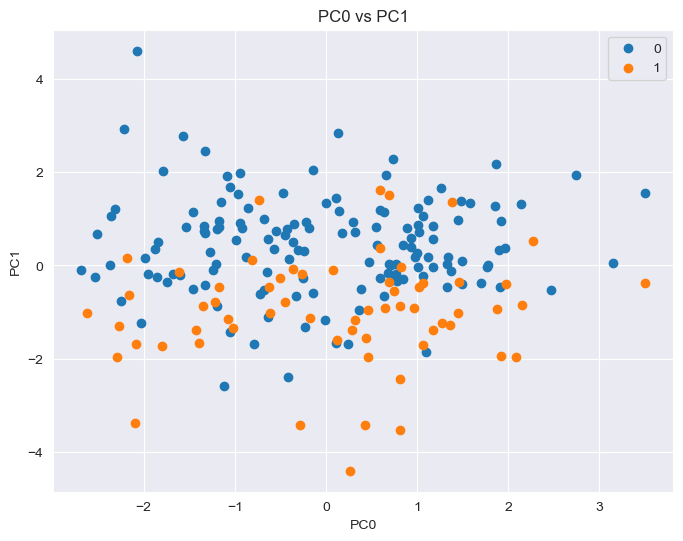

In [24]:
plt.figure(figsize=(8,6))
for c in np.unique(y_train):
    i = np.where(np.array(y_train)==c)
    print('number of points in class %s' %c,np.array(pc0)[i].shape)
    plt.scatter(np.array(pc0)[i], np.array(pc1)[i], label=c)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('PC0 vs PC1')
plt.legend()
plt.savefig('PC0-1.png')
plt.show()

## Web backend and frontend

#### Describe your server API, the web front-end, user interface.

My website has 4 routes.

1. @app.route('/')
This is my website homepage displaying dataset description and aforementioned summary statistics graphs made by plotly API. This page also allows users to select analysis options such as PCA, Correlation Analysis, and machine learning model Prediction interaction.
This is the screenshot of homepage:

![homepageimg](homepage_img.png)

2. @app.route('/interaction',methods=['GET','POST'])
This is the machine learning model interaction page where users can input several feature values, select one machine learning model and get the model's prediction result and corresponding probability. I deployed the top three best-performing models on the website, which are 'Logistic Regression', 'Ridge Classifier' and 'Random Forest (number of trees is n=19)'. We use pickle and sklearn API to save and load machine learning models.
These are the screenshots of my model interaction page:

![interactionpage1](interactionpage1.PNG)
![interactionpage2](interactionpage2.PNG)

3. @app.route('/pca',methods=['GET','POST'])
This is the principal component analysis page where users can input how many components they want to retain and get the pca result showing how many percentage of the whole information their chosen components contain. Users can also input 2 PCA components' indices to draw a scatter plot with class labels as colors. We use sklearn API to fit PCA and retrieve the results we need.
This is the screenshot of my PCA page:

![pcapage](pca_page.PNG)

4. @app.route('/correlation')
This is the correlation analysis displaying correlation coefficient heatmap among variables.
This is the screenshot of my correlation coefficient heatmap page:

![correlation](correlationpage.PNG)


The website can be run by mywebsite.py (I also put this code in the following code cell), HTML templates are in the 'templates' folder, other static resources are in the 'static' folder.
There are 5 HTML files in the 'templates' folder. The homepage renders index.html; the model interaction page renders interact.html to get users' input values and renders prediction.html to display model output results; the pca page renders pcainteract.html; the correlation analysis page renders correlation.html.

In [ ]:
from flask import Flask, render_template, request
import plotly.express as px
import plotly.graph_objects as go
import plotly.tools as tls
import pickle
import numpy as np
from sklearn import decomposition
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

app = Flask(__name__)

@app.route('/')
def homepage():
    data = pd.read_csv('cleaned_data.csv', dtype=np.float)
    fig = px.scatter(data,
                     x=np.linspace(1, 295, 295, endpoint=True),
                     y='serum_creatinine', labels={"x": 'patient index', "y": 'mg/dL'}, title='Serum_creatinine'
                     )
    fig.add_scatter(x=np.linspace(1, 295, 295, endpoint=True),
                    y=[1.2] * 295,
                    mode='lines',
                    hoverinfo='none',
                    line=dict(dash='dot', color='red'),
                    name='1.2mg/dL')
    fig.update_layout(yaxis=dict(title='mg/dL'))
    figure_json1 = fig.to_json()

    fig = tls.make_subplots(rows=1, cols=2)
    # Add first histogram
    fig.add_trace(go.Histogram(x=data.age, name='Age Histogram',nbinsx=16), row=1, col=1)

    # Add second histogram
    fig.add_trace(go.Histogram(x=data.ejection_fraction, name='ejection_fraction Histogram', nbinsx=16), row=1, col=2)
    fig.add_scatter(x=[50] * 100, y=np.linspace(1,100,100,endpoint=True),
                    mode='lines',
                    hoverinfo='none',
                    line=dict(dash='dot', color='blue'),
                    name='50%',row=1,col=2)
    fig.add_scatter(x=[70] * 100, y=np.linspace(1, 100, 100, endpoint=True),
                    mode='lines',
                    hoverinfo='none',
                    line=dict(dash='dot', color='gray'),
                    name='70%', row=1, col=2)
    # Define subplot titles and axis labels
    fig.update_layout(
        title='Age and ejection_fraction Histograms',
        xaxis=dict(title='age'),
        yaxis=dict(title='frequency'),
    )
    fig.update_xaxes(title_text='ejection_fraction', row=1, col=2)
    figure_json2 = fig.to_json()

    fig3 = px.scatter(data,
                     x=np.linspace(1, 295, 295, endpoint=True),
                     y='serum_sodium', labels={"x": 'patient index', "y": 'mmol/L'}, title='Serum_sodium'
                     )
    fig3.add_scatter(x=np.linspace(1, 295, 295, endpoint=True),
                    y=[135] * 295,
                    mode='lines',
                    hoverinfo='none',
                    line=dict(dash='dot', color='red'),
                    name='135mmol/L')
    fig3.add_scatter(x=np.linspace(1, 295, 295, endpoint=True),
                     y=[145] * 295,
                     mode='lines',
                     hoverinfo='none',
                     line=dict(dash='dot', color='gray'),
                     name='145mmol/L')
    fig3.update_layout(yaxis=dict(title='mmol/L'))
    figure_json3 = fig3.to_json()

    fig4 = px.pie(data, names="DEATH_EVENT", title='Death event')
    figure_json4 = fig4.to_json()

    return render_template('index.html', figure_json1=figure_json1, figure_json2=figure_json2, figure_json3=figure_json3, figure_json4=figure_json4)

@app.route('/interaction',methods=['GET','POST'])
def getvalues():
    if request.method == 'GET':
        return render_template('interact.html')
    elif request.method == 'POST':
        age = request.form.get('age')
        anaemia = request.form.get('anaemia')
        high_blood_pressure = request.form.get('high_blood_pressure')
        creatinine_phosphokinase = request.form.get('creatinine_phosphokinase')
        diabetes = request.form.get('diabetes')
        ejection_fraction = request.form.get('ejection_fraction')
        platelets = request.form.get('platelets')
        sex = request.form.get('sex')
        serum_creatinine = request.form.get('serum_creatinine')
        serum_sodium = request.form.get('serum_sodium')
        smoking = request.form.get('smoking')
        time = request.form.get('time')

        input_vector=np.array([age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,
                      high_blood_pressure,platelets,serum_creatinine,serum_sodium,
                      sex,smoking,time]).reshape(1,-1)

        # Standardization
        # mean and std of the training set
        mean = np.array([6.08042087e01, 4.22330097e-01, 5.56077670e+02, 4.22330097e-01,
                3.77669903e+01, 3.30097087e-01, 2.70237924e+05, 1.36713592e+00,
                1.36728155e+02, 6.65048544e-01, 3.39805825e-01, 1.30956311e+02]).reshape(1,-1)
        std = np.array([1.15888744e+01, 4.93930548e-01, 8.38148934e+02, 4.93930548e-01,
                        1.15667786e+01, 4.70247807e-01, 1.00616641e+05, 8.90432998e-01,
                        4.52113521e+00, 4.71973493e-01, 4.73643142e-01, 7.64563651e+01]).reshape(1,-1)

        # If there are any missing input values, take default values instead
        for i in range(len(input_vector[0])):
            if input_vector[0][i] in [None,'']:
                input_vector[0][i] = mean[0][i]

        input_vector_std=(np.array(input_vector, dtype=np.float)-mean)/std
        print(input_vector_std.shape)

        filenames = ['logistic.sav', 'ridge.sav', 'randomforest.sav', ]
        model_name = request.form.get('model')
        if model_name=='logistic':
            filename = filenames[0]
            loaded_model = pickle.load(open(filename, 'rb'))
            result = loaded_model.predict(input_vector_std)
            prob = np.max(loaded_model.predict_proba(input_vector_std))*100
            return render_template('prediction.html', result=result, prob=prob)
        elif model_name == 'ridge':
            filename = filenames[1]
            loaded_model = pickle.load(open(filename, 'rb'))
            result = loaded_model.predict(input_vector_std)
            return render_template('prediction.html', result=result)
        elif model_name == 'randomforest':
            filename = filenames[2]
            loaded_model = pickle.load(open(filename, 'rb'))
            result = loaded_model.predict(input_vector_std)
            prob = np.max(loaded_model.predict_proba(input_vector_std))*100
            return render_template('prediction.html', result=result, prob=prob)
        else:
            return 'You need to choose a specific model'

@app.route('/pca',methods=['GET','POST'])
def pcainter():
    if request.method == 'GET':
        showpca = False
        return render_template('pcainteract.html', showpca=showpca)
    elif request.method == 'POST':
        pca_n = request.form.get('pcacom')
        pca_graphx = request.form.get('pcagraphx')
        pca_graphy = request.form.get('pcagraphy')
        data = pd.read_csv('cleaned_data.csv',dtype=np.float)
        STDS = StandardScaler()
        X = data.drop(['DEATH_EVENT'],axis=1)
        STDS.fit(X)
        X = STDS.transform(X)
        print(X.shape)
        y = data['DEATH_EVENT']
        pca = decomposition.PCA(n_components=int(pca_n))
        data_reduced = pca.fit_transform(X)
        pc0 = data_reduced[:, int(pca_graphx)]
        pc1 = data_reduced[:, int(pca_graphy)]

        plt.figure(figsize=(8, 6))
        for c in np.unique(y):
            i = np.where(np.array(y) == c)
            print('number of points in class %s' % c, np.array(pc0)[i].shape)
            plt.scatter(np.array(pc0)[i], np.array(pc1)[i], label=c)
        plt.xlabel('PC%s' %pca_graphx)
        plt.ylabel('PC%s' %pca_graphy)
        plt.title('PC%s vs PC%s' % (pca_graphx , pca_graphy))
        plt.legend()
        plt.savefig("static/interactpca.png")
        explained = pca.explained_variance_ratio_
        total_info = np.round(np.sum(explained)*100,2)
        showpca = True
        return render_template('pcainteract.html', explained=explained, showpca=showpca, total_info=total_info, pca_n=pca_n)

@app.route('/correlation')
def correlation():
    data = pd.read_csv('cleaned_data.csv', dtype=np.float)
    plt.figure(figsize=(18, 18))
    sns.heatmap(np.round(data.corr(), 2), annot=True)
    plt.savefig('static/corr.png', bbox_inches='tight')
    return render_template('correlation.html')

if __name__ =="__main__":
    app.run(debug=True)

#### Mention any surprising results or unexpected difficulties.

* Surprising results

1. As observed in the correlation heatmap, there are many weakly correlated attributes, so I decide to select fewer variables with higher correlation coefficients ($\ge$0.2) to train models and evaluate their performance. The 5 selected attributes are 'age','ejection_fraction','serum_creatinine','serum_sodium' and 'time'.

The results in the table show that 5-feature version models perform better according to all 3 evaluation metrics. This means other 7 features are redundant and will introduce disturbance into our models.

|Model|Accuracy|MCC|F1-score| 5-feature version|Accuracy|MCC|F1-score|
|---|---|---|---|---|---|---|---|
|Logistic Regression|0.83|0.61|0.72| | 0.84|0.64|0.75|
|Ridge Classifier|0.84|0.64|0.74| | 0.85|0.66| 0.76|
|Random Forest (n=19)|0.79|0.50|0.63| | 0.83|0.61|0.73|
|Decision Tree|0.74|0.42|0.61| | 0.76| 0.47| 0.64|
|KNN (n=5)|0.74|0.38|0.44| |0.81| 0.56| 0.70|
|SVM (rbf)|0.78|0.47|0.58| | 0.82| 0.59| 0.71|


In [25]:
# Only take columns ['age','ejection_fraction','serum_creatinine','serum_sodium','time'], whose column indices are [0,4,7,8,11].
X_train_new = X_train[:,[0,4,7,8,11]]
print(X_train_new.shape)
X_test_new = X_test[:,[0,4,7,8,11]]
print(X_test_new.shape)

(206, 5)
(89, 5)


In [26]:
LR=LogisticRegression(C=1.0,penalty='l2')
LR.fit(X_train_new,y_train)
LR_pred=LR.predict(X_test_new)
LR_prob=LR.predict_proba(X_test_new)
print(classification_report(y_test,LR_pred))
print('MCC',matthews_corrcoef(y_test,LR_pred))
print('f1-score',f1_score(y_test,LR_pred))
filename='logistic5.sav'
pickle.dump(LR,open(filename,'wb'))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        59
           1       0.81      0.70      0.75        30

    accuracy                           0.84        89
   macro avg       0.83      0.81      0.82        89
weighted avg       0.84      0.84      0.84        89

MCC 0.6395644238565739
f1-score 0.75


In [27]:
clf=RidgeClassifier()
clf.fit(X_train_new,y_train)
clf_pred=clf.predict(X_test_new)
print(classification_report(y_test,clf_pred))
print('MCC',matthews_corrcoef(y_test,clf_pred))
print('f1-score',f1_score(y_test,clf_pred))
filename='ridge5.sav'
pickle.dump(clf,open(filename,'wb'))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        59
           1       0.84      0.70      0.76        30

    accuracy                           0.85        89
   macro avg       0.85      0.82      0.83        89
weighted avg       0.85      0.85      0.85        89

MCC 0.6649415355974628
f1-score 0.7636363636363636


In [28]:
clf=RandomForestClassifier(19)#criterion:'gini' index
clf.fit(X_train_new,y_train)
clf_pred=clf.predict(X_test_new)
print(classification_report(y_test,clf_pred))
print('MCC',matthews_corrcoef(y_test,clf_pred))
print('f1-score',f1_score(y_test,clf_pred))
filename='randomforest5.sav'
pickle.dump(clf,open(filename,'wb'))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        59
           1       0.88      0.70      0.78        30

    accuracy                           0.87        89
   macro avg       0.87      0.82      0.84        89
weighted avg       0.87      0.87      0.86        89

MCC 0.6914664235254688
f1-score 0.7777777777777777


In [29]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train_new,y_train)
clf_pred=clf.predict(X_test_new)
print(classification_report(y_test,clf_pred))
print('MCC',matthews_corrcoef(y_test,clf_pred))
print('f1-score',f1_score(y_test,clf_pred))
filename='decisiontree5.sav'
pickle.dump(clf,open(filename,'wb'))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        59
           1       0.72      0.60      0.65        30

    accuracy                           0.79        89
   macro avg       0.77      0.74      0.75        89
weighted avg       0.78      0.79      0.78        89

MCC 0.5062825632967277
f1-score 0.6545454545454547


In [30]:
clf=KNeighborsClassifier(5)
clf.fit(X_train_new,y_train)
clf_pred=clf.predict(X_test_new)
print(classification_report(y_test,clf_pred))
print('MCC',matthews_corrcoef(y_test,clf_pred))
print('f1-score',f1_score(y_test,clf_pred))
filename='knn5.sav'
pickle.dump(clf,open(filename,'wb'))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        59
           1       0.74      0.67      0.70        30

    accuracy                           0.81        89
   macro avg       0.79      0.77      0.78        89
weighted avg       0.81      0.81      0.81        89

MCC 0.5635174567628198
f1-score 0.7017543859649122


In [31]:
clf=SVC(kernel='rbf')
clf.fit(X_train_new,y_train)
clf_pred=clf.predict(X_test_new)
print(classification_report(y_test,clf_pred))
print('MCC',matthews_corrcoef(y_test,clf_pred))
print('f1-score',f1_score(y_test,clf_pred))
filename='svmrbf5.sav'
pickle.dump(clf,open(filename,'wb'))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        59
           1       0.77      0.67      0.71        30

    accuracy                           0.82        89
   macro avg       0.81      0.78      0.79        89
weighted avg       0.82      0.82      0.82        89

MCC 0.5872951550565416
f1-score 0.7142857142857142


* Limitations

1. The dataset lacks samples under the age of 40. Therefore, it is not well-trained on young population samples and can not give reliable predictions of their survival. A larger dataset will increase the generalization ability and reliability of trained models.

2. The dataset is imbalanced so the trained models are biased (prone to give majority label predictions).

3. Although we have found several attributes redundant, there might also be some other meaningful features not included in our dataset that can help increase model performance, such as patients' height, BMI and so on.

4. The dataset only contains patients' clinical records in Pakistan. If we can obtain a cohort of patients in another country/continent, it will help to validate our model.